In [2]:
import pandas as pd
import numpy as np
import prince

In [2]:
df_main = pd.read_csv(r'data\features_balanced.csv')
df_main.set_index("index", inplace = True)
df_main = df_main.replace(np.nan, 0)

In [151]:
#.drop(['canon'], axis=1)
#.iloc[:10, :100]
X = df_main.iloc[:50, :100]
y = df_main['canon'][:50]

In [152]:
pca = prince.PCA(
     n_components=2,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
     )

In [153]:
pca = pca.fit(X)

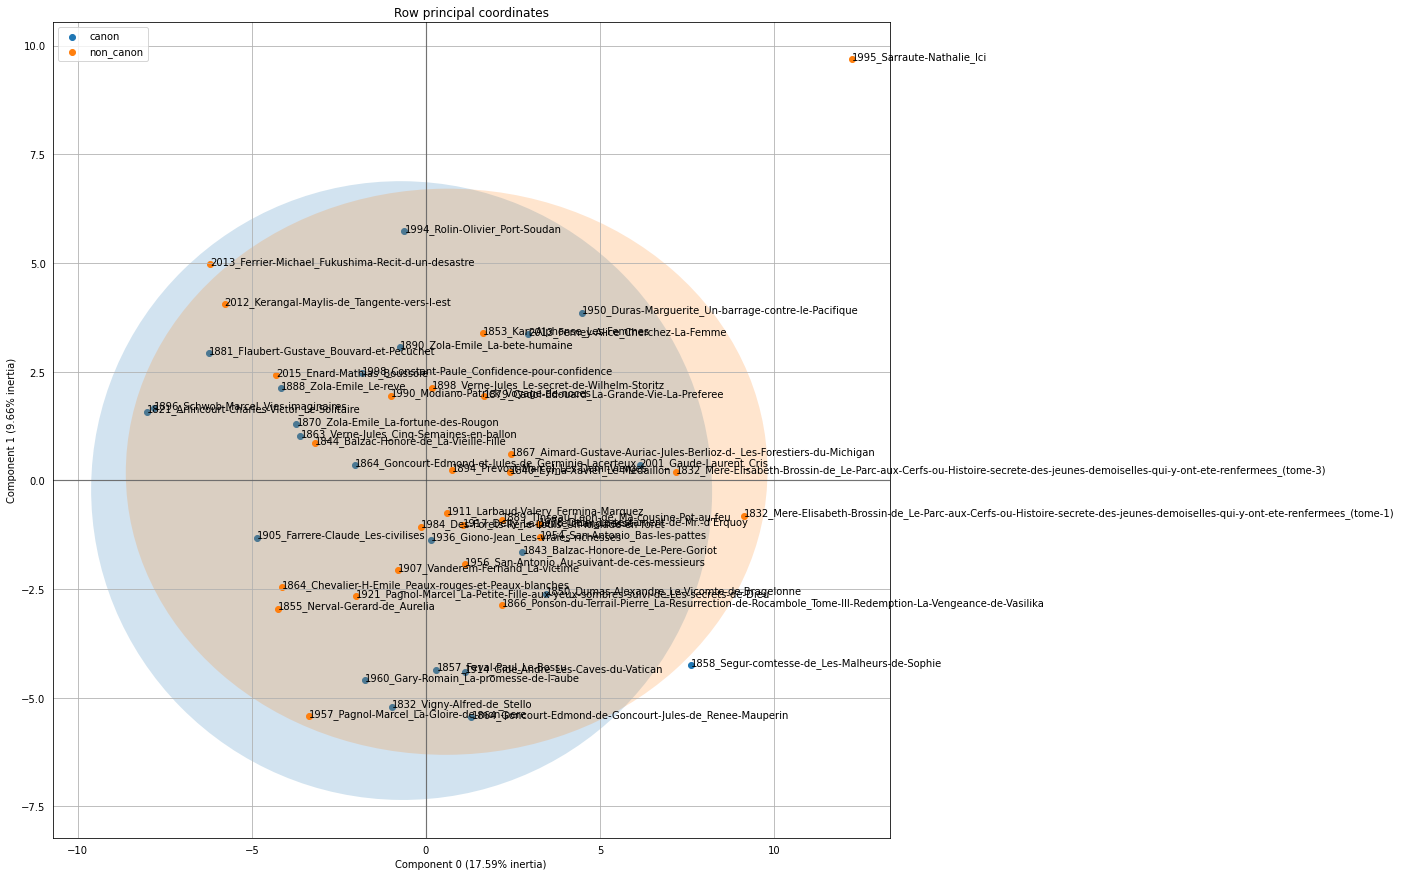

In [154]:
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(15, 15),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=y,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
     )

In [ ]:
#ax.get_figure().savefig('images/pca_row_coordinates.svg')

In [156]:
#.drop(['canon'], axis=1)
X = df_main.iloc[:50, :100]
y = df_main['canon'][:50]

In [157]:
ca = prince.CA(
     n_components=2,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
     )

In [158]:
X.columns.rename('features', inplace=True)
X.index.rename('novels', inplace=True)

In [159]:
ca = ca.fit(X)

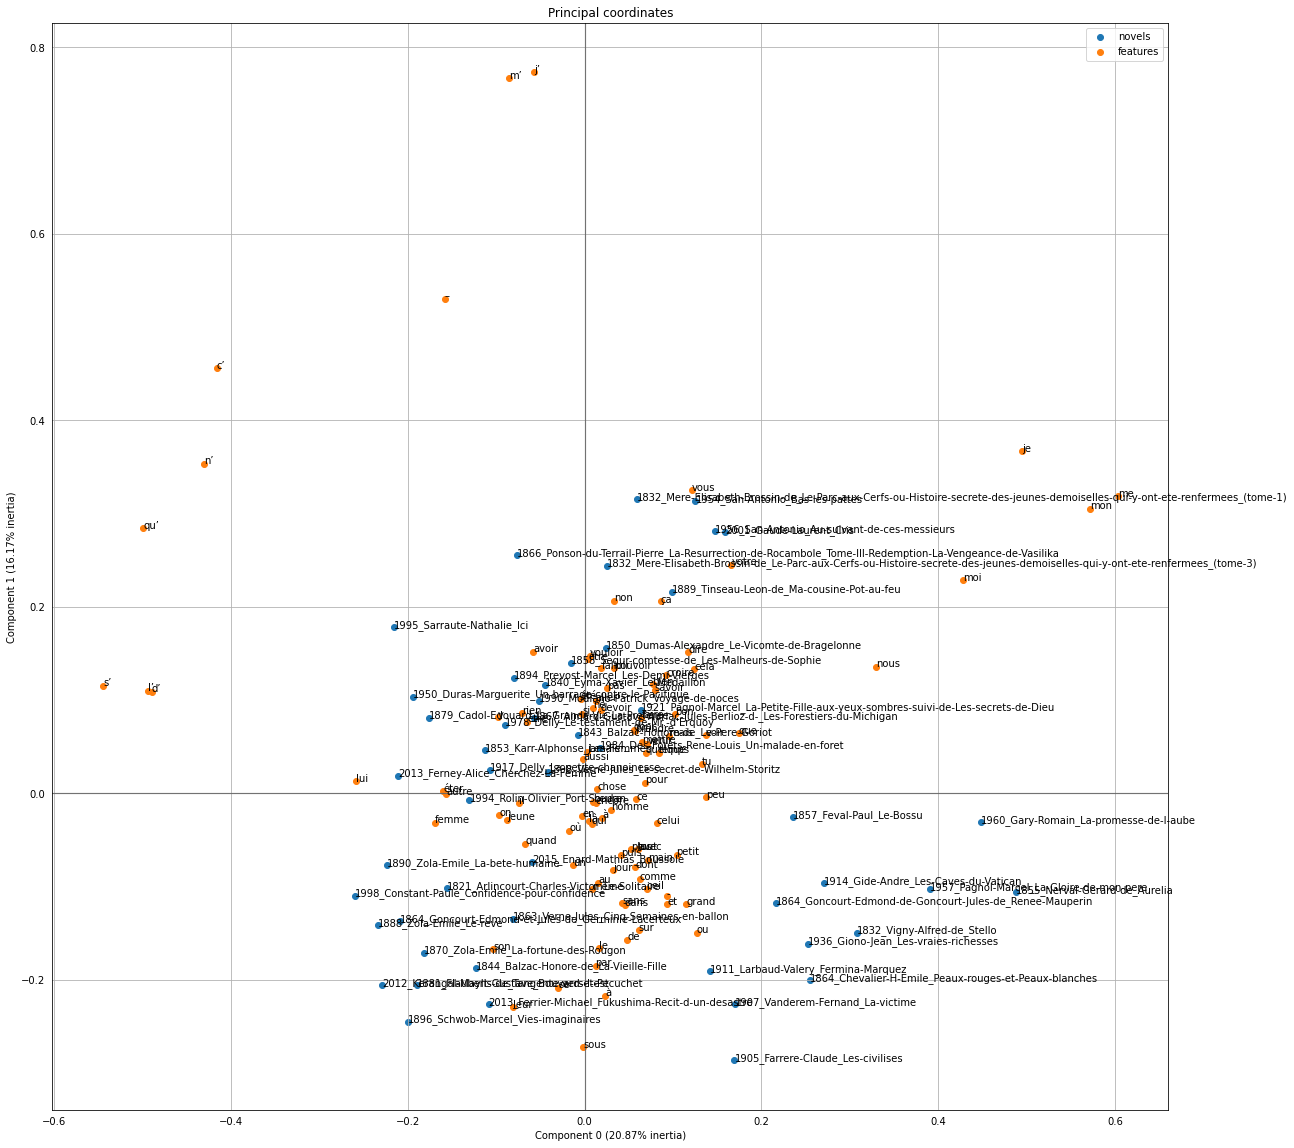

In [160]:
ax = ca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(20, 20),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
     )

In [ ]:
#ax.get_figure().savefig('images/ca_coordinates.svg')

In [6]:
df_balzac = pd.read_csv(r'auteurs_features\Balzac_features.csv')
df_balzac.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_balzac.set_index("index", inplace = True)
df_balzac = df_balzac.replace(np.nan, 0)

In [7]:
df_colette = pd.read_csv(r'auteurs_features\Colette_features.csv')
df_colette.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_colette.set_index("index", inplace = True)
df_colette = df_colette.replace(np.nan, 0)

In [16]:
df_test = df_balzac.append(df_colette)

<ipython-input-16-7e45531752e3>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_test = df_balzac.append(df_colette)


In [180]:
#.iloc[:, :100]
#.drop(['canon'], axis=1)
X = df_colette.iloc[:,:100]
y = df_colette['canon']

In [181]:
pca = pca.fit(X)

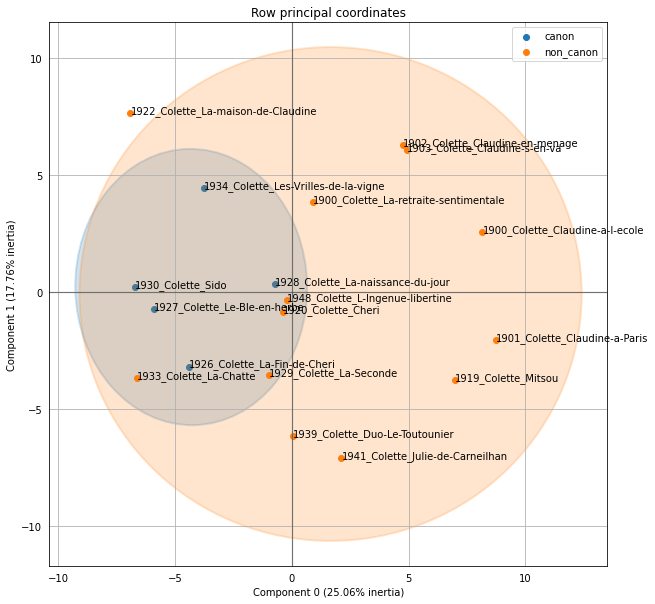

In [184]:
ax = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=y,
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True
     )

In [185]:
ax.get_figure().savefig('img/pca_Colette.svg')

In [56]:
ca = ca.fit(X)

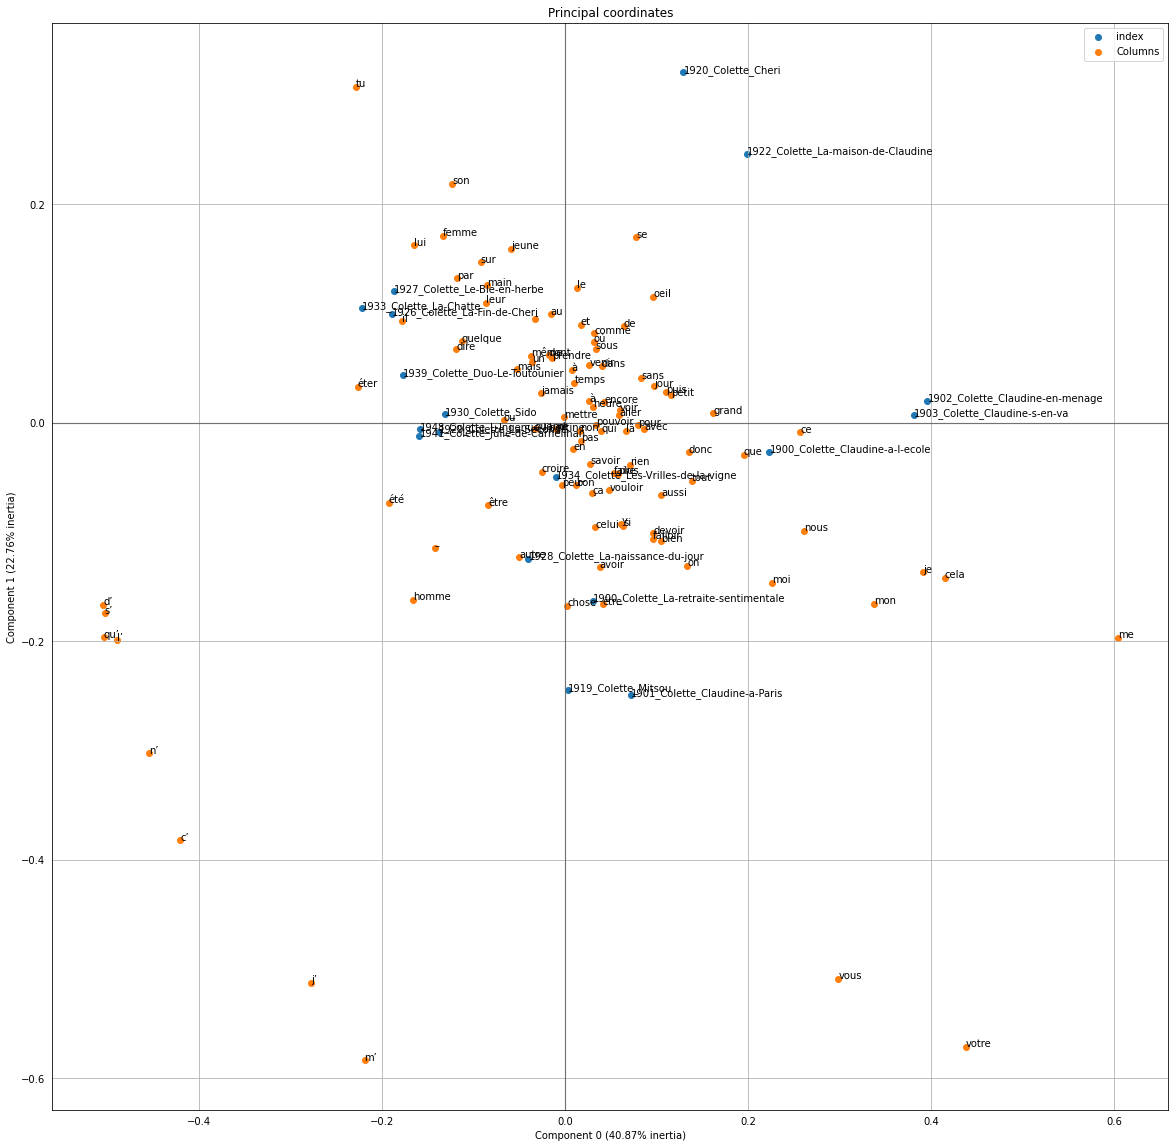

In [57]:
ax = ca.plot_coordinates(
     X=X,
     ax=None,
     figsize=(20, 20),
     x_component=0,
     y_component=1,
     show_row_labels=True,
     show_col_labels=True
     )

In [24]:
def pca_ca_auteurs(auteur, nb_oeuvres, rank):
    df = pd.read_csv("auteurs_features/"+auteur+'_features.csv')
    df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
    df.set_index("index", inplace = True)
    df = df.replace(np.nan, 0)
    df = df.replace(np.inf, 0)
                     
    X = df.iloc[:nb_oeuvres,:rank]
    y = df['canon'][:nb_oeuvres]
    
    pca = prince.PCA(
     n_components=2,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
     )
    
    pca = pca.fit(X)
    ax1 = pca.plot_row_coordinates(
     X,
     ax=None,
     figsize=(10, 10),
     x_component=0,
     y_component=1,
     labels=X.index,
     color_labels=y,
     ellipse_outline=True,
     ellipse_fill=True,
     show_points=True,
     )
   
    return ax1

In [172]:
ax1.title = 'hehe'

In [189]:
ax1.set_title("ACP Colette")

Text(0.5, 1.0, 'ACP Colette')

In [183]:
ax1

<AxesSubplot:title={'center':'ACP Georges Perec'}, xlabel='Component 0 (32.31% inertia)', ylabel='Component 1 (16.24% inertia)'>

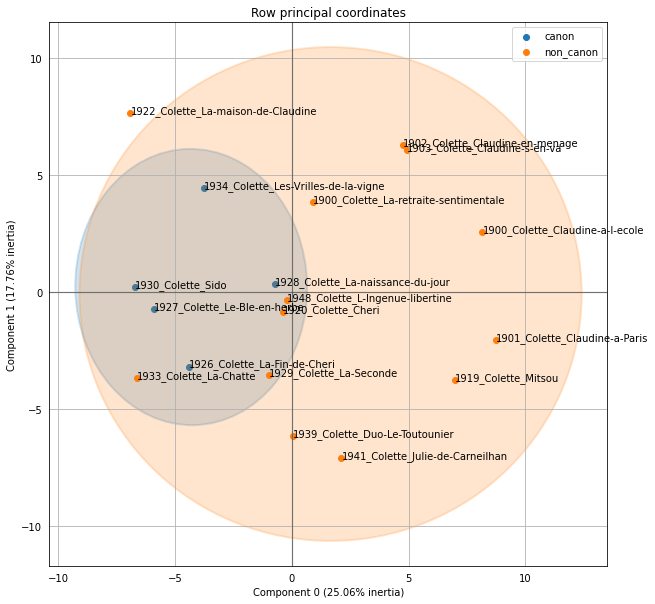

In [25]:
ax1 = pca_ca_auteurs('Colette', 50, 100)

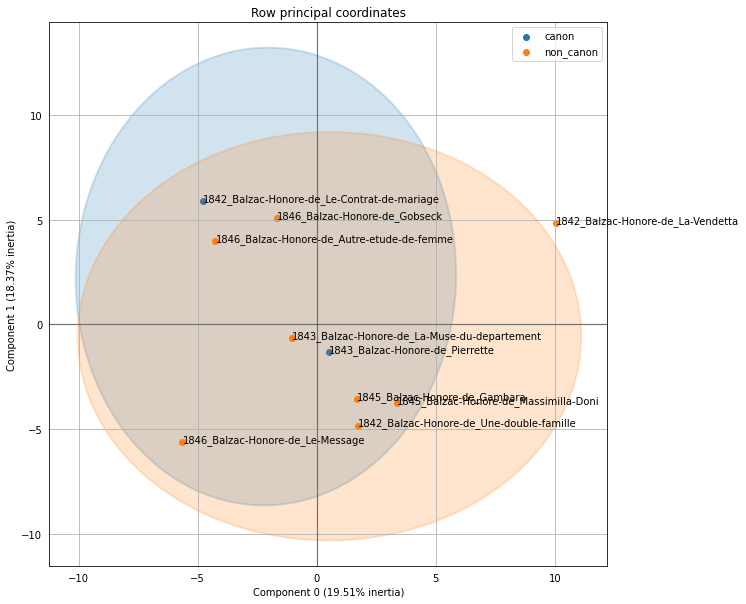

In [24]:
ax1 = pca_ca_auteurs('Balzac', 10, 100)

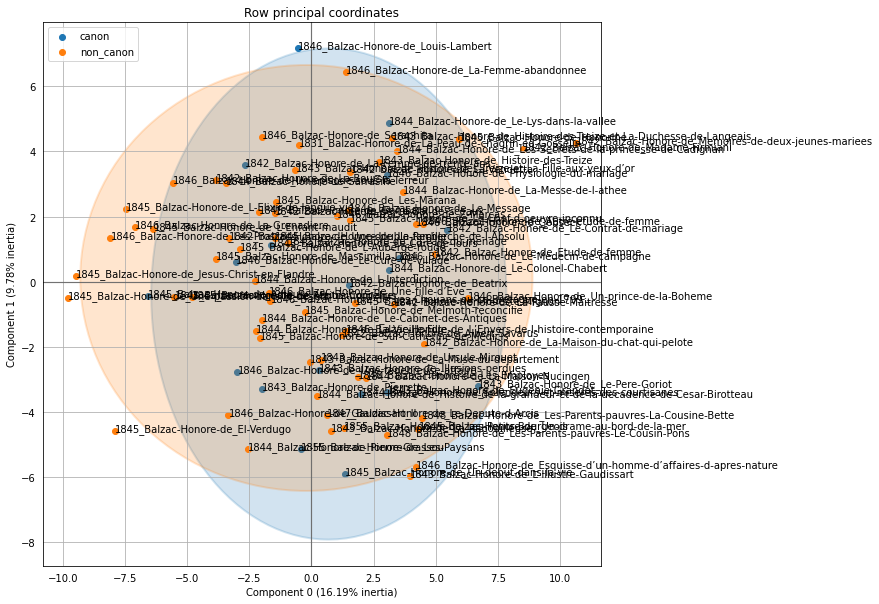

In [8]:
ax1 = pca_ca_auteurs('Balzac', 100)

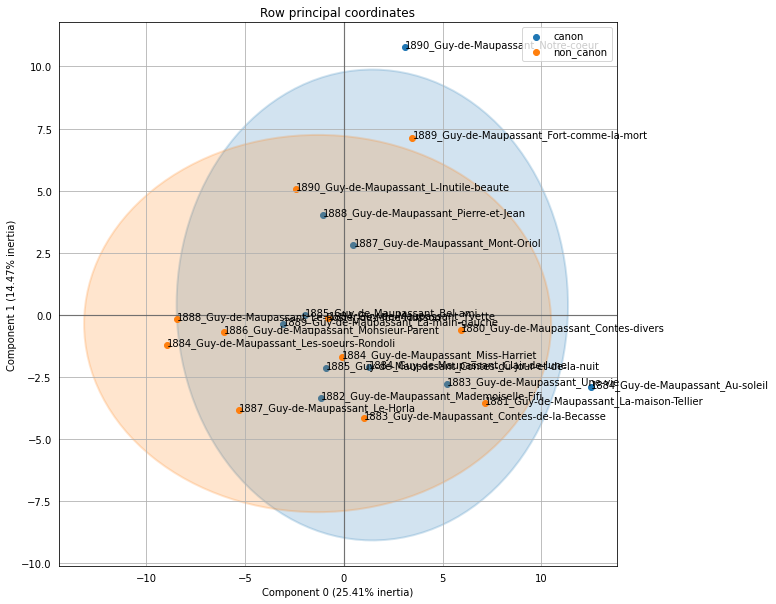

In [29]:
ax1 = pca_ca_auteurs('Guy de Maupassant', 100, 100)

In [177]:
ax1

<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (32.31% inertia)', ylabel='Component 1 (16.24% inertia)'>

In [30]:
ax1.get_figure().savefig('img/pca_Maupassant.svg')
#ax2.get_figure().savefig('img/pca_X.svg')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy
from scipy.cluster import hierarchy

import sklearn

import sys

print("Python Version : ", sys.version)
print("Scikit-Learn Version : ", sklearn.__version__)

Python Version :  3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Scikit-Learn Version :  1.0.2


In [4]:
df_balzac = pd.read_csv(r'auteurs_features\Balzac_features.csv')
df_balzac.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_balzac.set_index("index", inplace = True)
df_balzac = df_balzac.replace(np.nan, 0)

In [5]:
X = df_balzac.iloc[:,:1000]
y = df_balzac['canon']

In [6]:
len(y)

85

In [7]:
df_colette = pd.read_csv(r'auteurs_features\Colette_features.csv')
df_colette.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
df_colette.set_index("index", inplace = True)
df_colette = df_colette.replace(np.nan, 0)

In [8]:
X = df_colette.drop(['canon'], axis=1)
y = df_colette['canon']

In [9]:
clusters = hierarchy.linkage(X, method="complete")
# complete , average , single
clusters[:10]

array([[0.00000000e+00, 1.60000000e+01, 2.01196409e-02, 2.00000000e+00],
       [8.00000000e+00, 1.50000000e+01, 2.39955974e-02, 2.00000000e+00],
       [7.00000000e+00, 1.30000000e+01, 2.62643928e-02, 2.00000000e+00],
       [3.00000000e+00, 1.90000000e+01, 3.00969428e-02, 3.00000000e+00],
       [1.20000000e+01, 1.40000000e+01, 3.41975905e-02, 2.00000000e+00],
       [4.00000000e+00, 1.00000000e+01, 3.66972251e-02, 2.00000000e+00],
       [6.00000000e+00, 2.00000000e+01, 3.71823591e-02, 3.00000000e+00],
       [5.00000000e+00, 1.10000000e+01, 3.82608162e-02, 2.00000000e+00],
       [2.00000000e+00, 2.10000000e+01, 4.22054386e-02, 4.00000000e+00],
       [1.80000000e+01, 2.50000000e+01, 4.63648190e-02, 4.00000000e+00]])

In [37]:
def plot_dendrogram(clusters, df):
    #df.index
    plt.figure(figsize=(40,10))
    dendrogram = hierarchy.dendrogram(clusters, labels=y, orientation="top",leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance');
    plt.xticks(rotation=60)

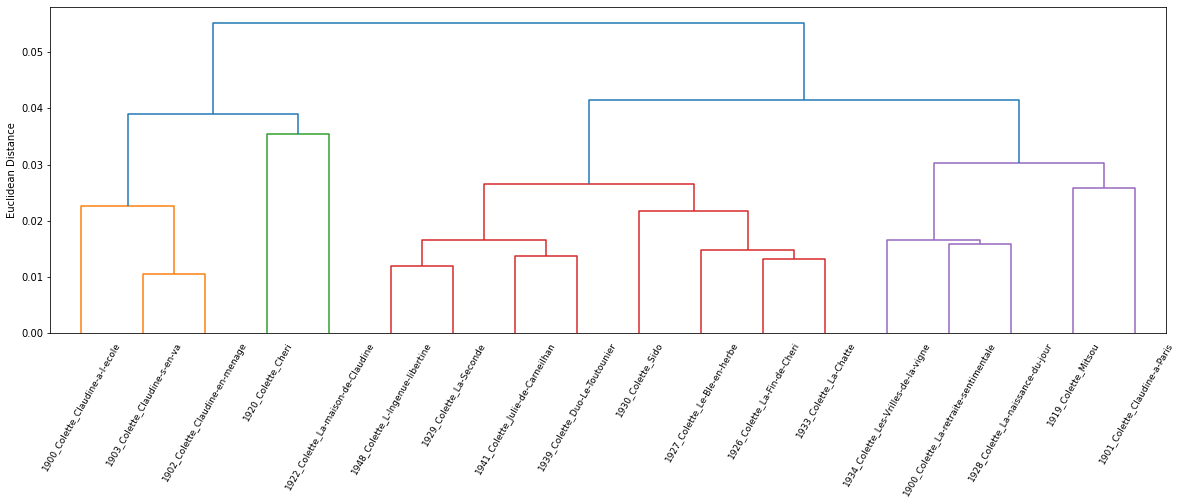

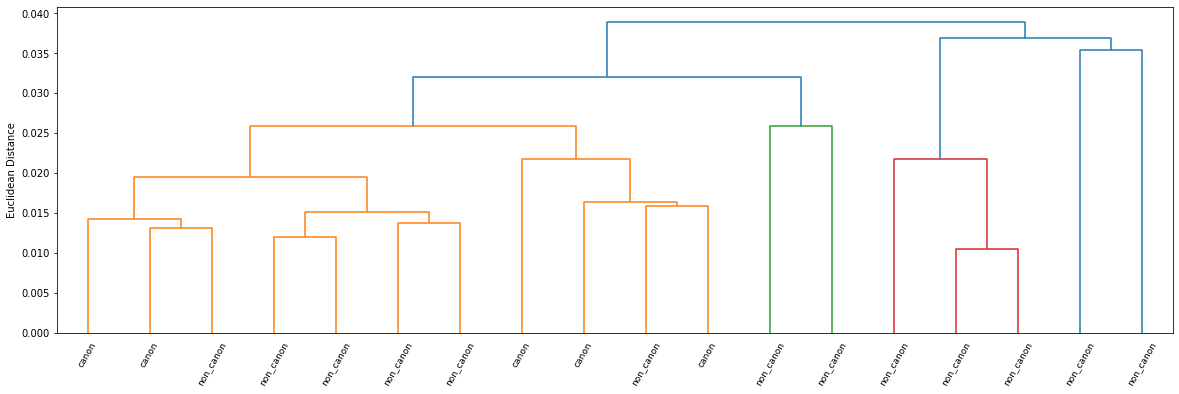

In [24]:
plot_dendrogram(clusters, df_colette)

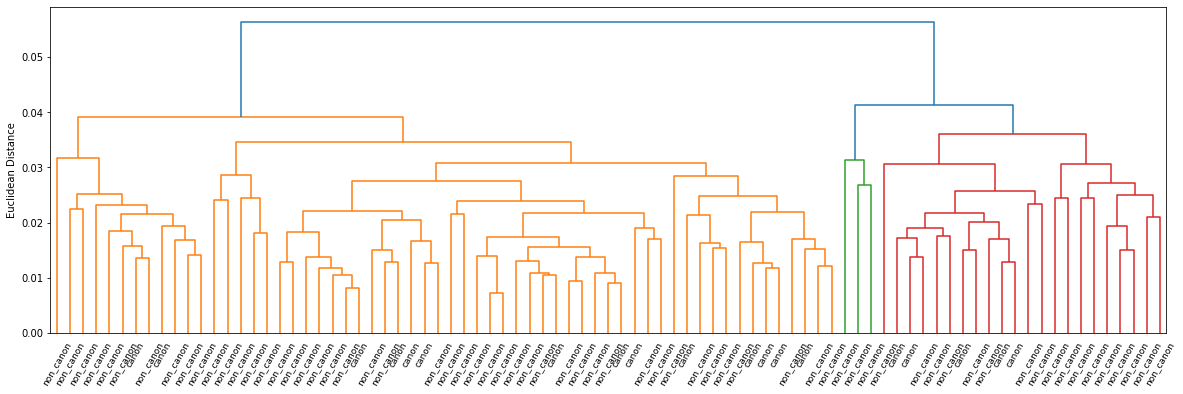

In [29]:
plot_dendrogram(clusters, df_balzac)

In [34]:
df_main = pd.read_csv(r'data\features_balanced.csv')
df_main.set_index("index", inplace = True)
df_main = df_main.replace(np.nan, 0)
X = df_main.iloc[:1000, :1200]
y = df_main['canon'][:1000]

In [35]:
clusters = hierarchy.linkage(X, method="complete")
# complete , average , single
clusters[:10]

array([[1.43000000e+02, 3.55000000e+02, 2.34689180e-05, 2.00000000e+00],
       [4.39000000e+02, 4.50000000e+02, 8.18362357e-03, 2.00000000e+00],
       [2.83000000e+02, 4.25000000e+02, 8.57542953e-03, 2.00000000e+00],
       [3.35000000e+02, 5.11000000e+02, 8.69746878e-03, 2.00000000e+00],
       [1.37000000e+02, 2.87000000e+02, 8.82287688e-03, 2.00000000e+00],
       [3.16000000e+02, 3.92000000e+02, 8.93527836e-03, 2.00000000e+00],
       [2.73000000e+02, 4.41000000e+02, 9.60506875e-03, 2.00000000e+00],
       [1.35000000e+02, 3.09000000e+02, 9.71377742e-03, 2.00000000e+00],
       [1.88000000e+02, 4.21000000e+02, 1.02862243e-02, 2.00000000e+00],
       [4.80000000e+01, 1.21000000e+02, 1.03498097e-02, 2.00000000e+00]])

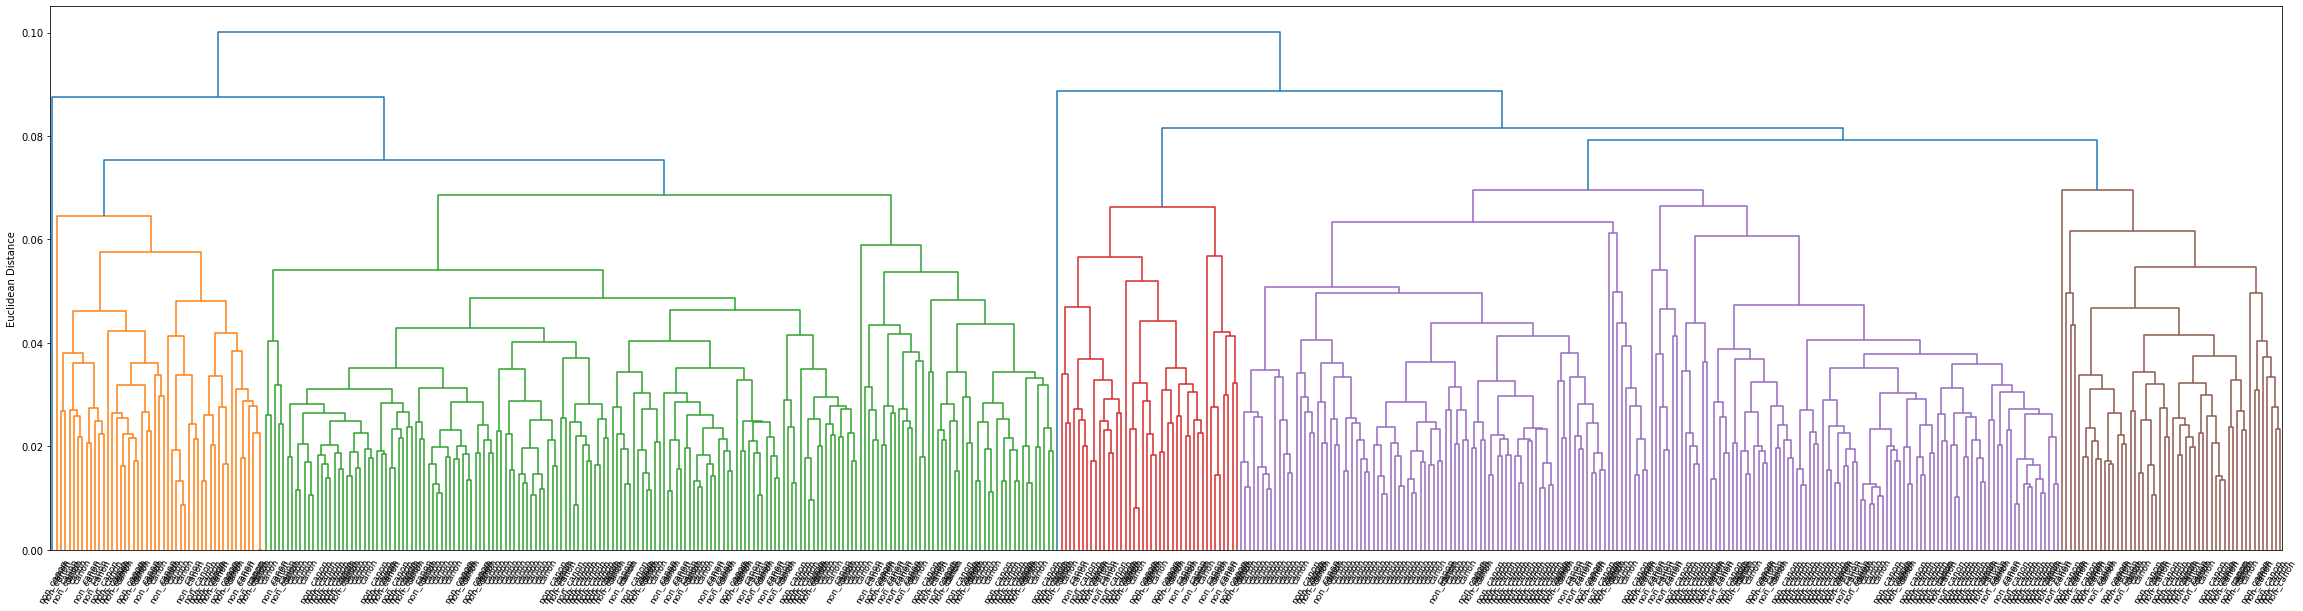

In [38]:
plot_dendrogram(clusters, df_main)

In [10]:
from scipy.cluster import hierarchy as shc
from scipy.spatial.distance import squareform, pdist

In [17]:
dist = pd.DataFrame(squareform(pdist(df_colette.drop(['canon'], axis=1), 'euclidean')))

<ipython-input-27-07477b928dd4>:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = shc.dendrogram(shc.linkage(dist, method='ward'), labels=df_colette.index, orientation="top",leaf_font_size=9, leaf_rotation=60)


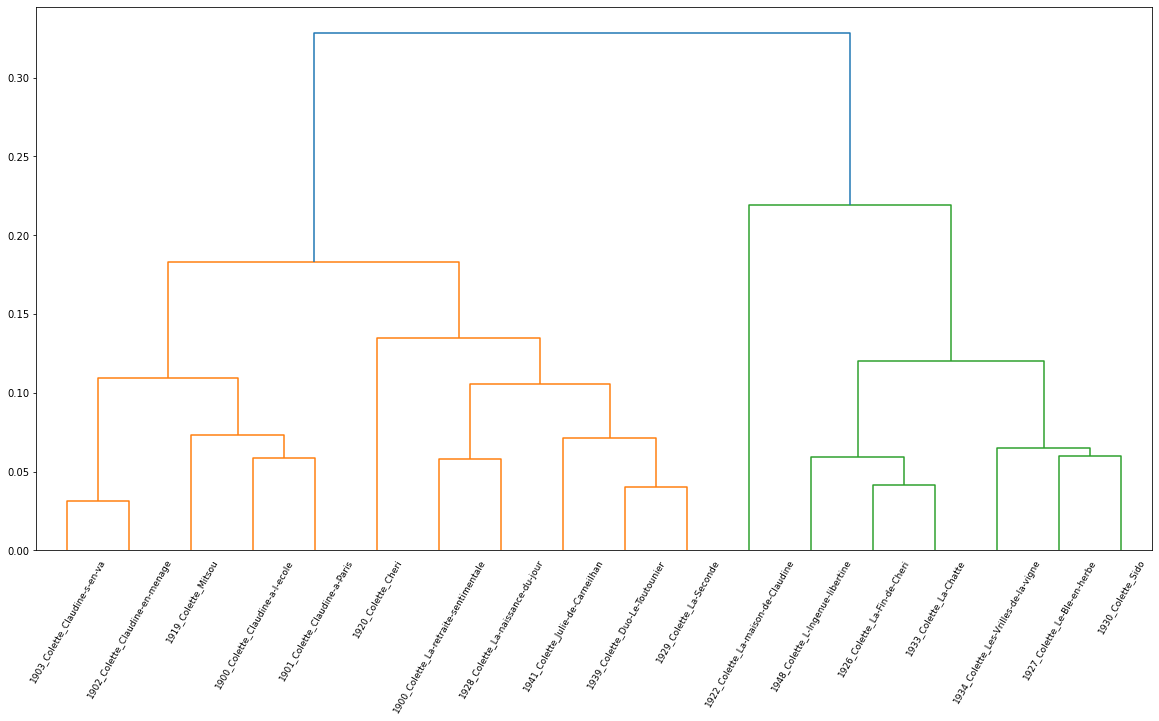

In [27]:
plt.figure(figsize=(20,10))
dend = shc.dendrogram(shc.linkage(dist, method='ward'), labels=df_colette.index, orientation="top",leaf_font_size=9, leaf_rotation=60)